# DOCUMENT OUTLINE 

For this assignment we decided that everyone should do all of the tasks in a separate notebook and then combine all the work **into one final notebook which is this one**.
In the first section, all of the tasks from exercise 4 and 5 were performed in the same order as in the exercises, but using our data instead. This was done in order to not miss anything.

In the other sections, **Section 2 and Section 3**, all of the tasks have been performed but in another order. 

# Section 1

In [4]:
try:
    from rich import load_ipython_extension
    %load_ext rich
except ImportError:
    try:
        from rich import pretty
        pretty.install()
    except ImportError:
        pass

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pingouin as pg
import numpy as np
from sklearn.mixture import GaussianMixture as GMM
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier

Before we begin, we must do some data cleaning and preparation!

In [6]:
df = pd.read_csv("data/manipulated_data.csv")
df.head()

level_of_education = {
    "primary and lower secondary education": "primary/lower secondary",
    "upper secondary education": "upper secondary",
    "post secondary education": "post-secondary",
    "no information about level of educational attainment": "unknown",
}

df["level_of_education"] = df["level_of_education"].replace(level_of_education)

df["avg_income"] = df["total_sum_sek_millions"] * 1_000_000 / df["number_of_persons"]

df

sex    age income_bracket  year  total_sum_sek_millions  \
0         Man  16-19            TOT  2018                   547.9   
1         Man  16-19              0  2018                     0.0   
2         Man  16-19           1-19  2018                   137.9   
3         Man  16-19          20-39  2018                   106.1   
4         Man  16-19          40-59  2018                    77.2   
...       ...    ...            ...   ...                     ...   
409255  Woman  65-69          80-99  2012                     0.9   
409256  Woman  70-75            TOT  2012                     2.4   
409257  Woman  70-75              0  2012                     0.0   
409258  Woman  70-75           1-19  2012                     0.1   
409259  Woman  70-75          80-99  2012                     0.6   

        number_of_persons region_name       level_of_education     avg_income  
0                   38091   Stockholm  primary/lower secondary   14383.975217  
1                   13357   Stockholm  primary/lower secondary       0.000000  
2                   17417   Stockholm  primary/lower secondary    7917.551817  
3                    3763   Stockholm  primary/lower secondary   28195.588626  
4                    1574   Stockholm  primary/lower secondary   49047.013977  
...                   ...         ...                      ...            ...  
409255                 10  Norrbotten                  unknown   90000.000000  
409256                 36  Norrbotten                  unknown   66666.666667  
409257                 11  Norrbotten                  unknown       0.000000  
409258                  6  Norrbotten                  unknown   16666.666667  
409259                  6  Norrbotten                  unknown  100000.000000  

[409260 rows x 9 columns]

## Tasks based on exercise 4

## Regression

**1.** Regression task 1: Perform regression as done in task 1 in exercise 4. 

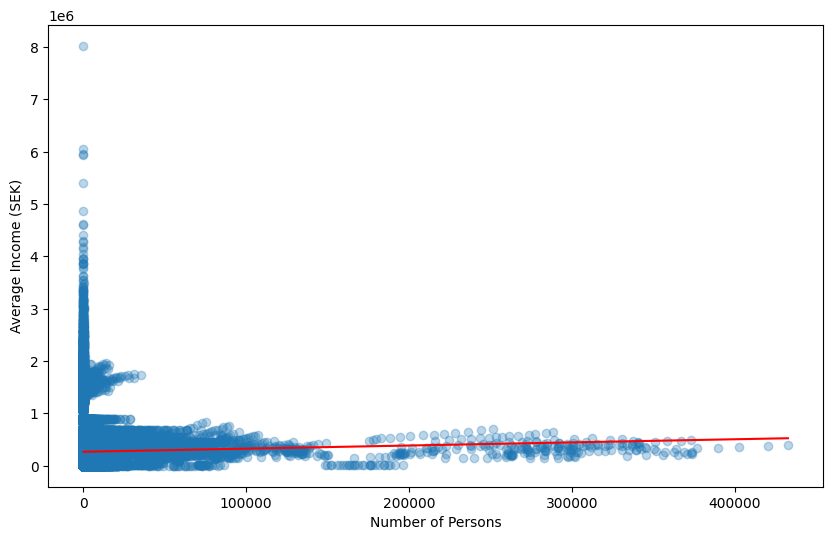

In [7]:
df_plot = df[df['number_of_persons'] > 0]

X = df_plot[["number_of_persons"]].values
y = df_plot["avg_income"].values

model = LinearRegression()
model.fit(X, y)

xfit = np.linspace(X.min(), X.max(), 100)[:, np.newaxis]
yfit = model.predict(xfit)

plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.3)
plt.plot(xfit, yfit, color="red")
plt.xlabel("Number of Persons")
plt.ylabel("Average Income (SEK)")
plt.show()


Task 2: do the same for **polynomial regression.**

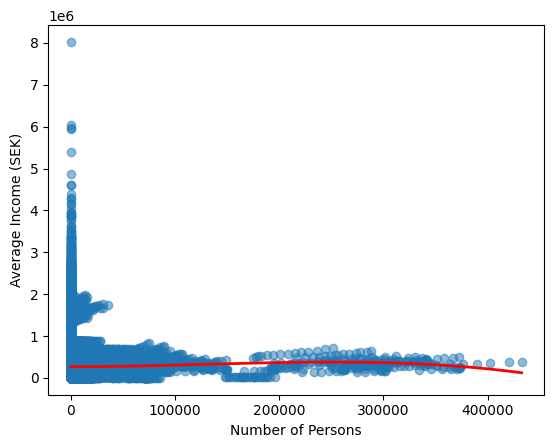

In [8]:
X = df_plot[["number_of_persons"]].values
y = df_plot["avg_income"].values

poly_model = make_pipeline(PolynomialFeatures(3), LinearRegression())
poly_model.fit(X,y)

xfit = np.linspace(X.min(), X.max(), 100)[:, np.newaxis]
yfit = poly_model.predict(xfit)

plt.scatter(X, y, alpha=0.5)
plt.plot(xfit, yfit, color="red", linewidth=2)
plt.xlabel("Number of Persons")
plt.ylabel("Average Income (SEK)")
plt.show()

- - - 
## Clustering


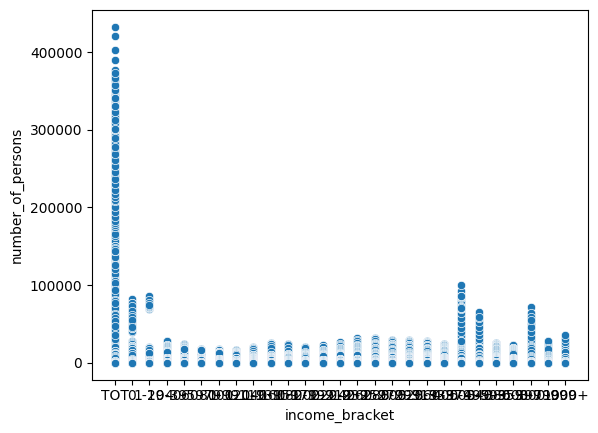

In [9]:
sns.scatterplot(data=df, y="number_of_persons", x="income_bracket");

3. Run k-Means clustering (with 3 clusters)

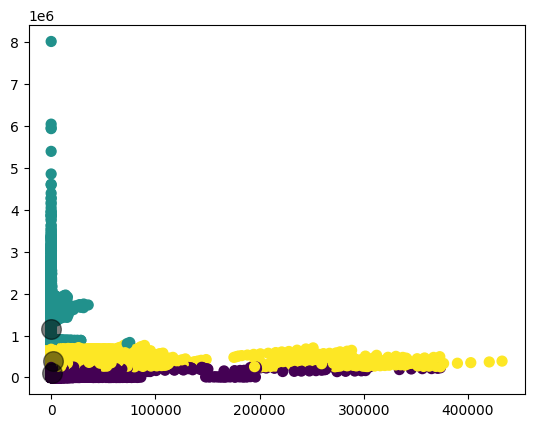

In [10]:

X = df[["number_of_persons", "avg_income"]].values

num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

**4. Run a Gaussian Mixture Model (GMM) in the same way and plot the result!**

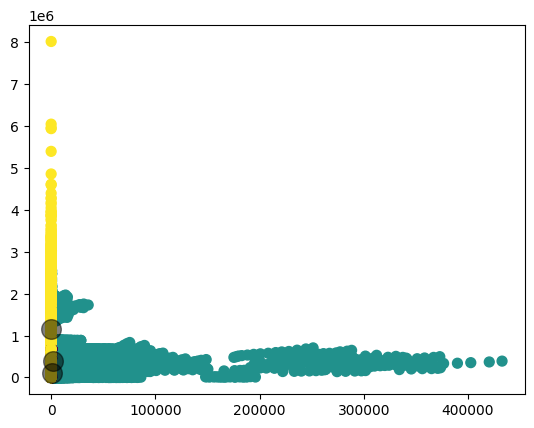

In [11]:
gmm = GMM(n_components=3).fit(X)
labels = gmm.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

**5. Run the GMM model several times. Is the result always the same?** 

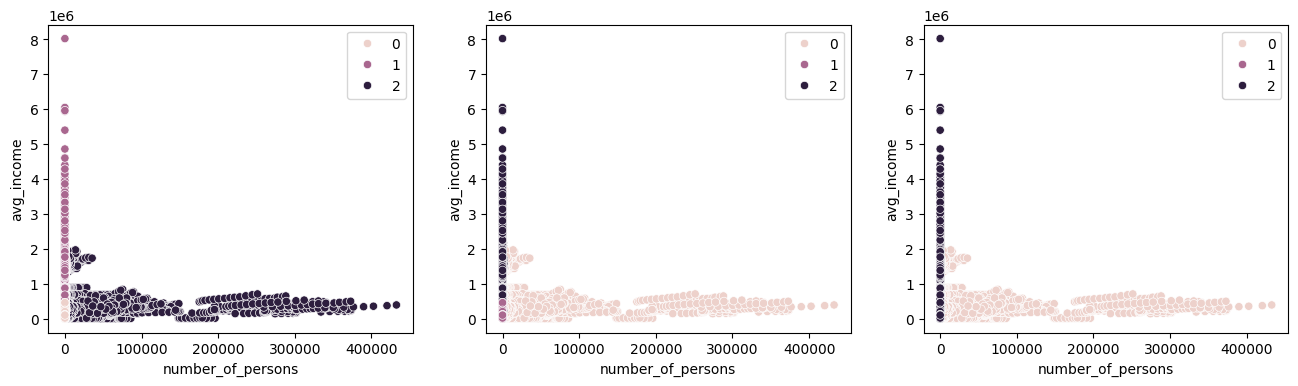

In [12]:
X = df[["number_of_persons", "avg_income"]].values

def plot_gmm(i, g):
    model = GMM(n_components=3, random_state=7 + i)
    y = model.fit_predict(X)
    sns.scatterplot(ax=g, x=df["number_of_persons"], y=df["avg_income"], hue=y)

fig, ax = plt.subplots(1, 3, figsize=(16, 4))
for i in range(3):
    plot_gmm(i, ax[i])

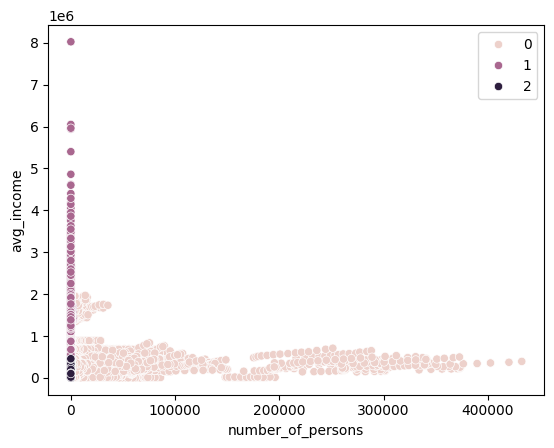

In [13]:
model = GMM(n_components=3, n_init=10)
y = model.fit_predict(X)
sns.scatterplot(x=df["number_of_persons"], y=df["avg_income"], hue=y);

- - - 
## Decision Trees & Model Validation

**6. Split the data into a _train_ and _test_ set**

In [14]:
df.head()

df = df[(df['number_of_persons'] > 0) & (df['income_bracket'] != 'TOT')]

X = df[["sex", "age", "year", "number_of_persons", "level_of_education"]]
y = df["avg_income"]


categorical = ["sex", "age", "level_of_education"]
numerical = ["year", "number_of_persons"]

preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical),
        ("num", "passthrough", numerical)
    ]
)

clf_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", DecisionTreeClassifier(max_depth=4, random_state=0))
])

y = df["income_bracket"]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=1)

**7. Train a decision tree classifier and produce predictions on the test set.** 

In [15]:
clf_pipeline.fit(X_train, y_train)
y_pred = clf_pipeline.predict(X_test)

print(y_pred)

['220-239' '220-239' '400-499' ... '60-79' '80-99' '60-79']


**8. Evaluate how well your classifier performs.** Look at:

- accuracy;
- F1-scores
- the absolute number of _wrong_ predictions your classifier made.

In [16]:
print(accuracy_score(y_test, y_pred))

0.07828752452897947


In [17]:
print(f1_score(y_test, y_pred, average='macro'))

0.039149078180092986


In [18]:
tot = len(y_test)
wrong = 0
for i,j in zip(y_test, y_pred):
    if i != j:
        wrong +=1

print(f"{wrong} wrong out of {tot} total")

71865 wrong out of 77969 total


**9. Plot a _confusion matrix_** that shows how often a class was mistakenly for another.

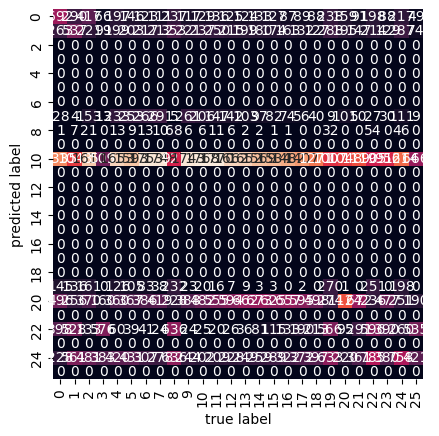

In [19]:
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

**10. What is the first criterion your decision tree splits on? Is there a feature that is (almost) never used?**

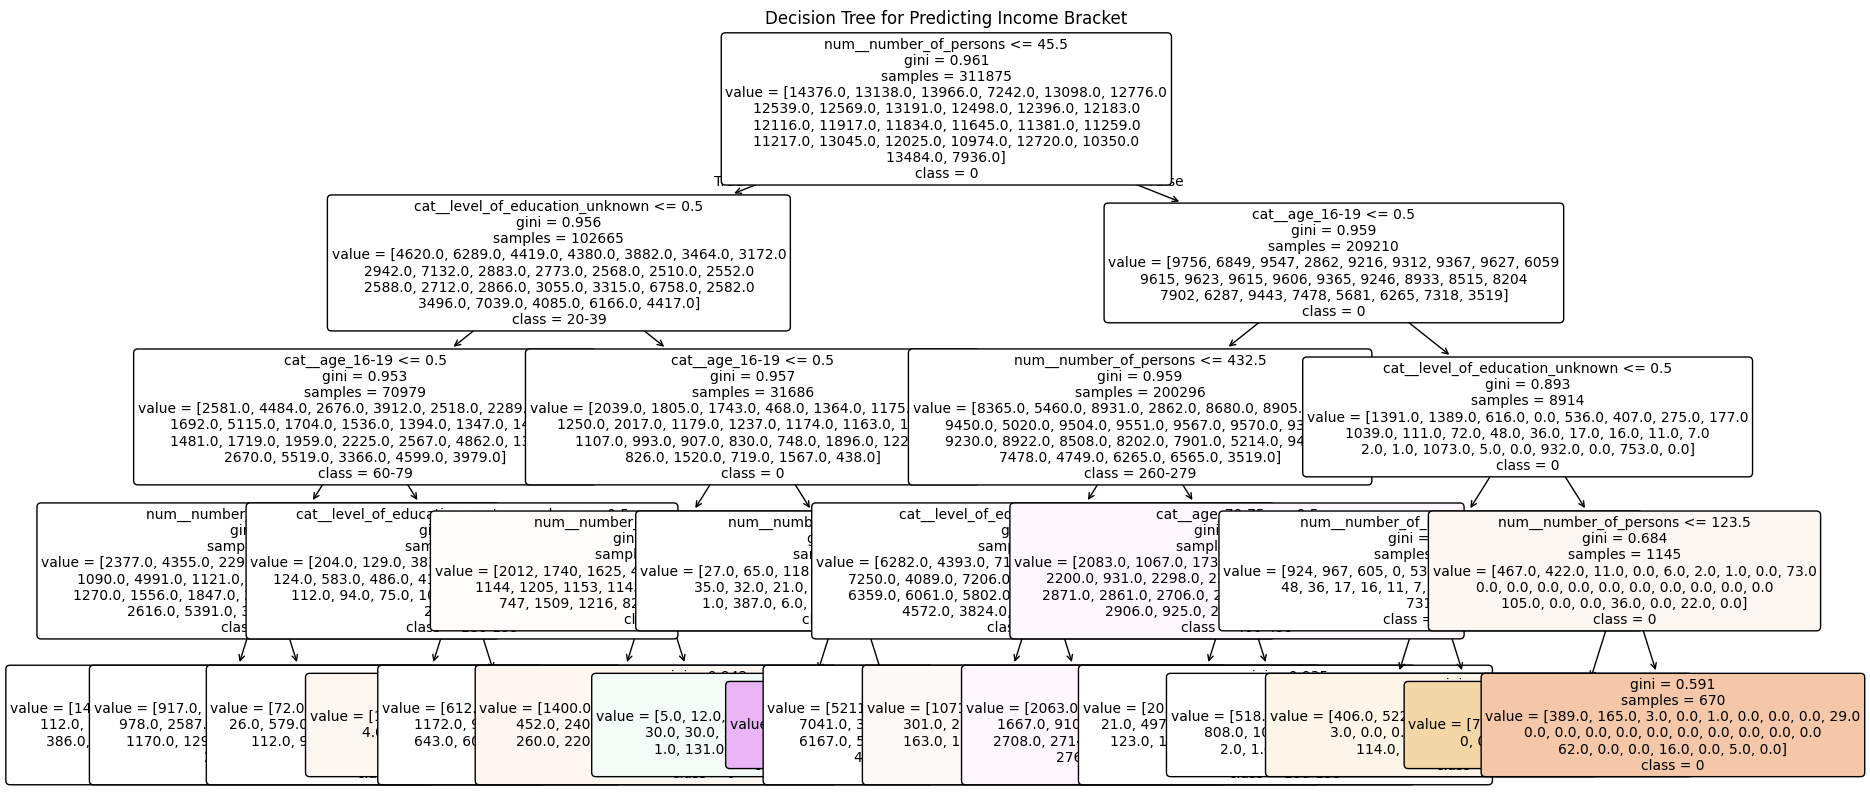

In [20]:
# clf_pipeline.fit(X_train, y_train)

clf = clf_pipeline.named_steps["classifier"]

feature_names = clf_pipeline.named_steps["preprocessor"].get_feature_names_out()

plt.figure(figsize=(20, 10))
plot_tree(
    clf,
    feature_names=feature_names,
    class_names=clf.classes_,
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree for Predicting Income Bracket")
plt.show()

- - - 
## SVMs, Hyperparameters, and Cross-Validation

**11. Split your data into _train_ and _test_ set again**  
Here we once again use one hot encoding, but this time with the Pandas "get_dummies" method. 

In [21]:
print(df.head())
print(df.columns.to_list()) # ['sex', 'age', 'income_bracket', 'year', 'total_sum_sek_millions', 'number_of_persons', 'region_name', 'level_of_education', 'avg_income']

df = df[(df['number_of_persons'] > 0) & (df['income_bracket'] != 'TOT')]

df_sample = df.sample(n=10000, random_state=111) 

X = pd.get_dummies(df_sample[["region_name", "level_of_education"]], columns=["region_name", "level_of_education"])
y = df_sample["sex"]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=111)

# print(X_train.head())
# print(y_train.head())

   sex    age income_bracket  year  total_sum_sek_millions  number_of_persons  \
1  Man  16-19              0  2018                     0.0              13357   
2  Man  16-19           1-19  2018                   137.9              17417   
3  Man  16-19          20-39  2018                   106.1               3763   
4  Man  16-19          40-59  2018                    77.2               1574   
5  Man  16-19          60-79  2018                    50.9                745   

  region_name       level_of_education    avg_income  
1   Stockholm  primary/lower secondary      0.000000  
2   Stockholm  primary/lower secondary   7917.551817  
3   Stockholm  primary/lower secondary  28195.588626  
4   Stockholm  primary/lower secondary  49047.013977  
5   Stockholm  primary/lower secondary  68322.147651  
['sex', 'age', 'income_bracket', 'year', 'total_sum_sek_millions', 'number_of_persons', 'region_name', 'level_of_education', 'avg_income']


**12. Fit a support vector classifier to the data and evaluate its accuracy!** 

In [22]:
from sklearn.svm import SVC

model = SVC(kernel='linear', C=1.0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.51


**13. Using the same classifier as above, perform _10-fold cross-validation_ to evaluate its accuracy!** 

In [23]:
from sklearn.model_selection import cross_val_score

clf = SVC(kernel='linear', C=1.0)

cvs = cross_val_score(clf, X, y, cv=10)
print(cvs)


[0.492 0.525 0.524 0.533 0.523 0.508 0.51  0.483 0.5   0.493]


**14. Perform grid search to find the best kernel and regularization value for our task!**

In [24]:
# Define parameter grid
param_grid = {
    'kernel': ['linear', 'rbf'],
    'C': [1, 10, 100]
}

# Create the SVC model
svc = SVC()

# Set up GridSearchCV
grid = GridSearchCV(svc, param_grid, cv=5)
grid.fit(X_train, y_train)

print("Best parameters:", grid.best_params_)
print("Best cross-validation score:", grid.best_score_)

# Evaluate on test set
y_pred = grid.predict(X_test)
print("Test set accuracy:", accuracy_score(y_test, y_pred))

Best parameters: {'C': 1, 'kernel': 'linear'}
Best cross-validation score: 0.51
Test set accuracy: 0.51


## Tasks from exercise 5 starts here

In [25]:
try:
    from rich import load_ipython_extension
    %load_ext rich
except ImportError:
    try:
        from rich import pretty
        pretty.install()
    except ImportError:
        pass
    
import pandas as pd
import pingouin as pg
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

df = pd.read_csv("data/manipulated_data.csv")
df.head()

level_of_education = {
    "primary and lower secondary education": "primary/lower secondary",
    "upper secondary education": "upper secondary",
    "post secondary education": "post-secondary",
    "no information about level of educational attainment": "unknown",
}

df["level_of_education"] = df["level_of_education"].replace(level_of_education)

df["avg_income"] = df["total_sum_sek_millions"] * 1_000_000 / df["number_of_persons"]

df = df[(df['number_of_persons'] > 0) & (df['income_bracket'] != 'TOT')]

df.head()

The rich extension is already loaded. To reload it, use:
  %reload_ext rich


sex    age income_bracket  year  total_sum_sek_millions  number_of_persons  \
1  Man  16-19              0  2018                     0.0              13357   
2  Man  16-19           1-19  2018                   137.9              17417   
3  Man  16-19          20-39  2018                   106.1               3763   
4  Man  16-19          40-59  2018                    77.2               1574   
5  Man  16-19          60-79  2018                    50.9                745   

  region_name       level_of_education    avg_income  
1   Stockholm  primary/lower secondary      0.000000  
2   Stockholm  primary/lower secondary   7917.551817  
3   Stockholm  primary/lower secondary  28195.588626  
4   Stockholm  primary/lower secondary  49047.013977  
5   Stockholm  primary/lower secondary  68322.147651

## Permutation feature importance


In [26]:
print(df.columns.to_list())

df_sample = df.sample(n=10000, random_state=111) 

X = df_sample[
    [
    'year', 
    'total_sum_sek_millions', 
    'number_of_persons', 
    'avg_income'
    ]
]

df_sample = df_sample.join(pd.get_dummies(df[["age", "income_bracket", 'level_of_education']]))

y = df_sample["sex"]
model = SVC(C=1.0, gamma=0.0001, kernel="rbf")

['sex', 'age', 'income_bracket', 'year', 'total_sum_sek_millions', 'number_of_persons', 'region_name', 'level_of_education', 'avg_income']


In [27]:

#This code below is more extensive but takes extremely long time to run, 
#even when only using 10k entries. 


# print(df.columns.to_list())

# df_sample = df.sample(n=10000, random_state=111)
# df_sample = pd.get_dummies(df_sample, columns=["age", "income_bracket", "level_of_education"])

# X = df_sample.drop(columns=["sex", "region_name"])
# le = LabelEncoder()
# y = le.fit_transform(df_sample["sex"])

# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=111, train_size=0.8)

# model = SVC(C=1.0, gamma=0.0001, kernel="rbf")
# clf = model.fit(X_train, y_train)
# y_pred = model.predict(X_test)

# print(accuracy_score(y_test, y_pred))

**1. Make a train/test split, train the model, and calculate its accuracy on the test set.**

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=111, train_size=0.8)

clf = model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(accuracy_score(y_test, y_pred))

0.526


**2. Calculate permutation importance over the input features.**

In [29]:
result = permutation_importance(model, X_test, y_test, n_repeats=10,random_state=0)

result["importances_mean"]
pd.DataFrame([X.columns, result['importances_mean']]).T.set_index(0)

1
0                              
year                     0.0006
total_sum_sek_millions  -0.0037
number_of_persons       0.00635
avg_income               0.0131

**3. Change your train/test data** (e.g. `X_train`, `X_test`) **to only include the _two most important features_.** Then retrain the model with that & evaluate it again.

In [30]:
df_sample = df.sample(n=10000, random_state=111) 

X = df_sample[
    [
        "number_of_persons",
        "avg_income",
    ]
]

y = df_sample["sex"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=111, train_size=0.8)

model = SVC(C=1.0, gamma=0.0001, kernel="rbf")

clf = model.fit(X_train, y_train)
y_pred_good = model.predict(X_test)

print(accuracy_score(y_test, y_pred_good))

0.5245


**4. Do the same thing, but train the model on the _two least important features only_.**

In [31]:
df_sample = df.sample(n=10000, random_state=111) 

X = df_sample[
    [
        "year",
        "total_sum_sek_millions",
    ]
]

y = df_sample["sex"]
model = SVC(C=1.0, gamma=0.0001, kernel="rbf")

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=111, train_size=0.8)

clf = model.fit(X_train, y_train)
y_pred_bad = model.predict(X_test)

print(accuracy_score(y_test, y_pred_bad))

0.512


**5. What accuracy score would you get if you always guessed the majority class?** 

In [32]:
y_train.value_counts()

y_majority = ["Man"] * len(y_test)
accuracy_score(y_majority, y_test)

0.517

- - - 
## Statistical testing

**6. Which of our measurement variables are _normally distributed_?**

In [33]:
df_sub = df[(df["sex"] == "Woman")]

print(pg.normality(df_sub))

                               W           pval  normal
year                    0.943543  1.392342e-109   False
total_sum_sek_millions  0.129727  4.176041e-197   False
number_of_persons       0.198630  4.344083e-194   False
avg_income              0.769875  2.574038e-151   False


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 188495.
  res = hypotest_fun_out(*samples, **kwds)


**7. Which of the measurement variables are _correlated_?** Perform a pairwise correlation analysis with all the columns of our dataframe.

In [34]:
cols = ['year', 'total_sum_sek_millions', 'number_of_persons','avg_income']
pairs = []

def backtrack(start, path):
    if len(path) == 2:
        pairs.append(tuple(path))
        return
    for i in range(start, len(cols)):
        backtrack(i+1, path + [cols[i]])

backtrack(0,[])

print(pairs)
correlations = []
for pair in pairs:
    correlations.append(pg.corr(df[pair[0]], df[pair[1]]))

print(correlations)

pg.pairwise_corr(df_sub, method="pearson")

[('year', 'total_sum_sek_millions'), ('year', 'number_of_persons'), ('year', 'avg_income'), ('total_sum_sek_millions', 'number_of_persons'), ('total_sum_sek_millions', 'avg_income'), ('number_of_persons', 'avg_income')]
[              n         r         CI95%         p-val       BF10  power
pearson  389844  0.018018  [0.01, 0.02]  2.285650e-29  6.178e+24    1.0,               n         r         CI95%     p-val   BF10  power
pearson  389844 -0.003002  [-0.01, 0.0]  0.060865  0.012  0.466,               n         r         CI95%         p-val       BF10  power
pearson  389844  0.024262  [0.02, 0.03]  7.508642e-52  1.401e+47    1.0,               n         r         CI95%  p-val BF10  power
pearson  389844  0.810655  [0.81, 0.81]    0.0  inf    1.0,               n         r         CI95%  p-val BF10  power
pearson  389844  0.138467  [0.14, 0.14]    0.0  inf    1.0,               n         r         CI95%         p-val       BF10  power
pearson  389844  0.030664  [0.03, 0.03]  9.572649e

X                       Y   method alternative  \
0                    year  total_sum_sek_millions  pearson   two-sided   
1                    year       number_of_persons  pearson   two-sided   
2                    year              avg_income  pearson   two-sided   
3  total_sum_sek_millions       number_of_persons  pearson   two-sided   
4  total_sum_sek_millions              avg_income  pearson   two-sided   
5       number_of_persons              avg_income  pearson   two-sided   

        n         r          CI95%         p-unc       BF10     power  
0  188495  0.019853   [0.02, 0.02]  6.694727e-18  3.938e+13  1.000000  
1  188495 -0.004924  [-0.01, -0.0]  3.252925e-02      0.028  0.570616  
2  188495  0.031274   [0.03, 0.04]  5.182042e-42  3.253e+37  1.000000  
3  188495  0.823880   [0.82, 0.83]  0.000000e+00        inf  1.000000  
4  188495  0.112890   [0.11, 0.12]  0.000000e+00        inf  1.000000  
5  188495  0.013002   [0.01, 0.02]  1.649779e-08  2.402e+04  0.999886

**8. Make a new Pandas DataFrame with "classifier correctness" labels.**

In [35]:
classifier_correctness = pd.DataFrame(
    np.transpose([y_pred_good == y_test, y_pred_bad == y_test, y_majority == y_test]),
    columns=["good", "bad", "majority"],
)
classifier_correctness

good    bad  majority
0      True   True      True
1      True  False     False
2      True  False     False
3     False  False     False
4      True  False     False
...     ...    ...       ...
1995   True  False     False
1996   True   True      True
1997   True   True      True
1998  False   True      True
1999   True  False     False

[2000 rows x 3 columns]

**9. Is the "bad" model (from Q4) still significantly better than the "majority" class model (from Q5)?**

In [36]:
observed, stats = pg.chi2_mcnemar(classifier_correctness, "bad", "majority")
stats

chi2  dof  p-approx   p-exact
mcnemar  1.35    1  0.245278  0.245061

According to the McNemar test, the $p$-value needs to be less than $< 0.05$ in order to determine that there is a significant difference between the classifiers. 
In our case, we get a $p$-approx value of **0.245278**, which indicates that the "bad" classifier isnt significantly better than the "majority" classifier.

**10. Is the "good" model (from Q3) significantly better than the "bad" model (from Q4)?**

In [37]:
observed, stats = pg.chi2_mcnemar(classifier_correctness, "good", "bad")
stats

chi2  dof  p-approx   p-exact
mcnemar  0.756899    1  0.384301  0.384314

According to the McNemar test, the $p$-value needs to be less than $< 0.05$ in order to determine that there is a significant difference between the classifiers. 
In our case, we get a $p$-approx value of **0.384301**, which indicates that the "good" classifier isnt significantly better than the "bad" classifier.

- - - 
## Dimensionality reduction

In this section, we will focus on Dimensionality reduction, and we will use two common techniques called **principal component analysis (PCA)** and **t-distributed stochastic neighbor embedding (t-SNE)**.

We first need to load our original dataset again and create valid train-test splits.

In [38]:
from sklearn.decomposition import PCA

df = pd.read_csv("data/manipulated_data.csv")
df.head()

level_of_education = {
    "primary and lower secondary education": "primary/lower secondary",
    "upper secondary education": "upper secondary",
    "post secondary education": "post-secondary",
    "no information about level of educational attainment": "unknown",
}

df["level_of_education"] = df["level_of_education"].replace(level_of_education)

df["avg_income"] = df["total_sum_sek_millions"] * 1_000_000 / df["number_of_persons"]

df = df[(df['number_of_persons'] > 0) & (df['income_bracket'] != 'TOT')]

**11. Perform a principal component analysis (PCA) to map the data into 2-dimensional space.** 

In this code below, we try to use PCA to to map the data into 2-dimensional space and try to visualize it. PCA will keep important features and allows us to visualise the data easily. 

In [39]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

df_sample = df.copy()
df_sample = pd.get_dummies(df_sample, columns=["age", "income_bracket", "level_of_education"])

X = df_sample.drop(columns=["sex", "region_name"])
y = df_sample["sex"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


**12. Plot the result after dimensionality reduction.** 

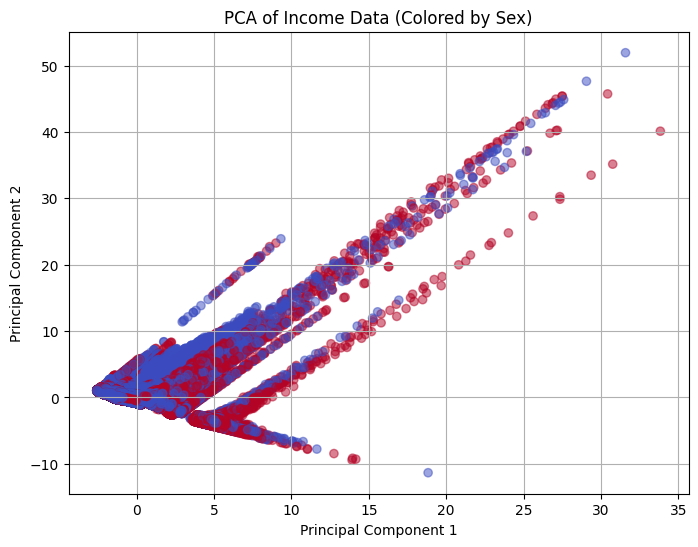

In [40]:
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=(y == 'Man'), cmap='coolwarm', alpha=0.5)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA of Income Data (Colored by Sex)")
plt.grid(True)
plt.show()

**13. Perform a t-SNE transformation and plot it as well!**

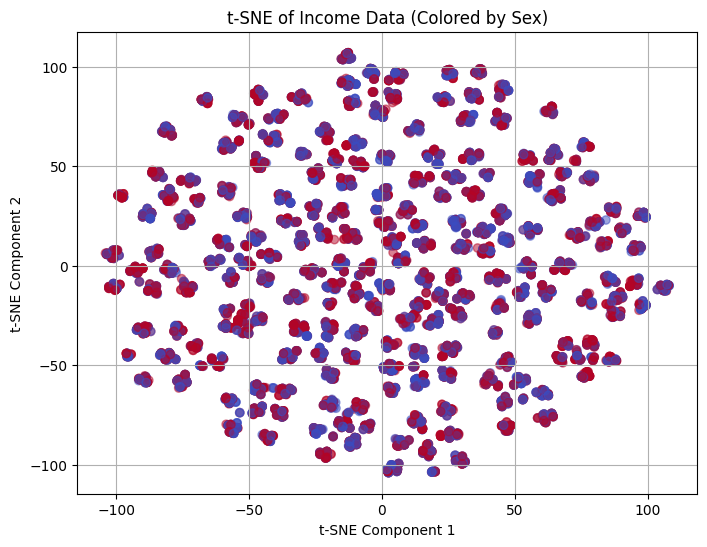

In [41]:
from sklearn.manifold import TSNE

df_sample = df.sample(n=10000)
df_sample = pd.get_dummies(df_sample, columns=["age", "income_bracket", "level_of_education"])

X = df_sample.drop(columns=["sex", "region_name"])
y = df_sample["sex"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

tsne = TSNE(learning_rate="auto", init="random")
X_tsne = tsne.fit_transform(X_scaled)


plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=(y == 'Man'), cmap='coolwarm', alpha=0.5)
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.title("t-SNE of Income Data (Colored by Sex)")
plt.grid(True)
plt.show()

**14. Repeat the t-SNE plot with different random states and perplexity values.** 

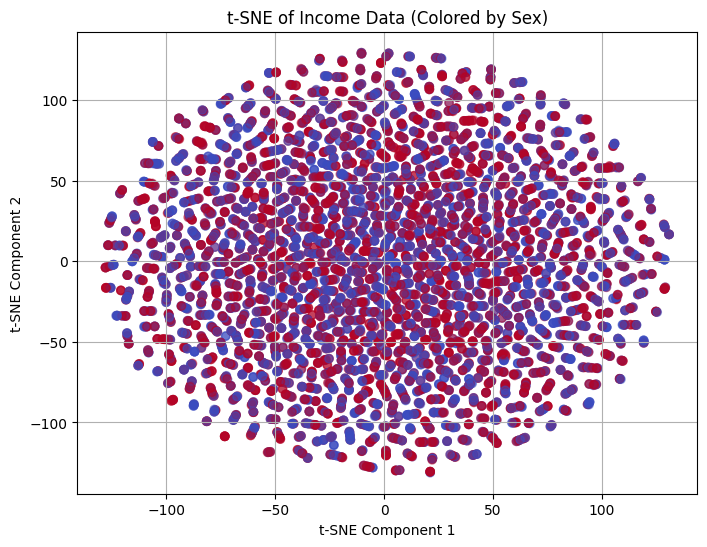

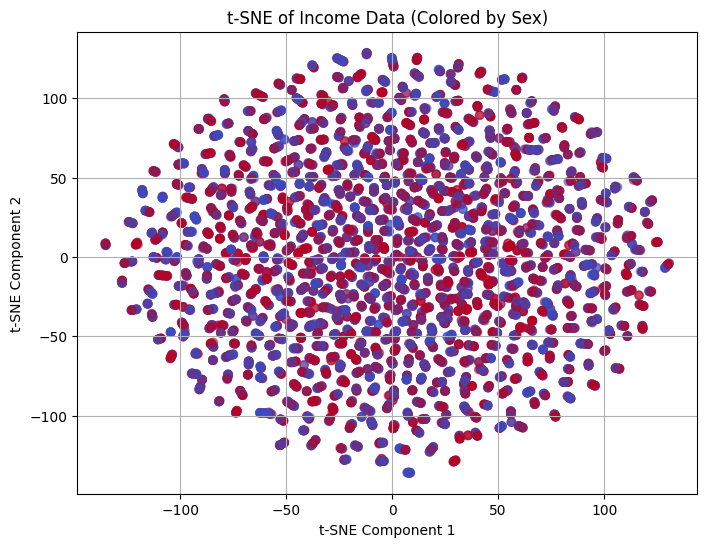

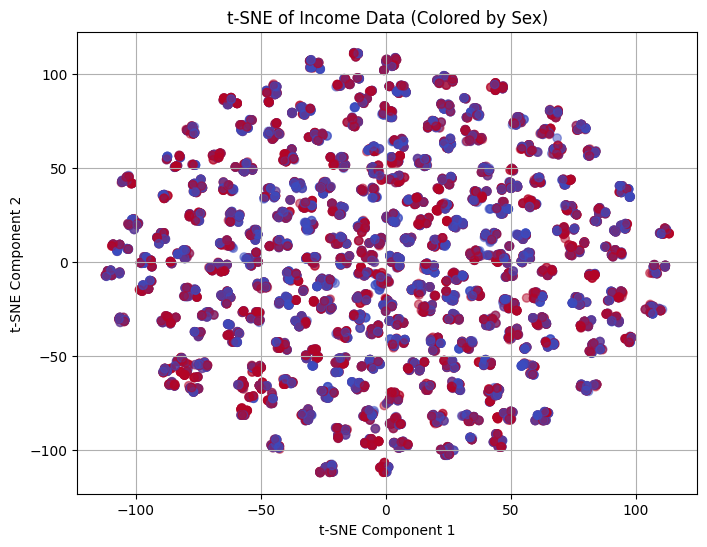

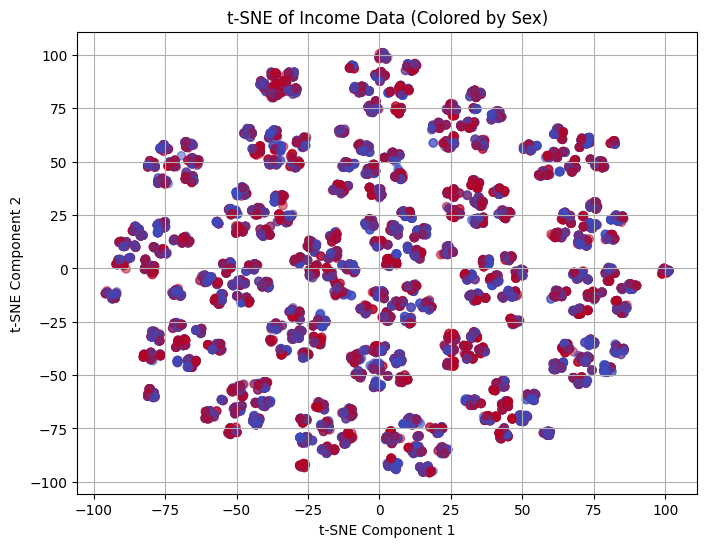

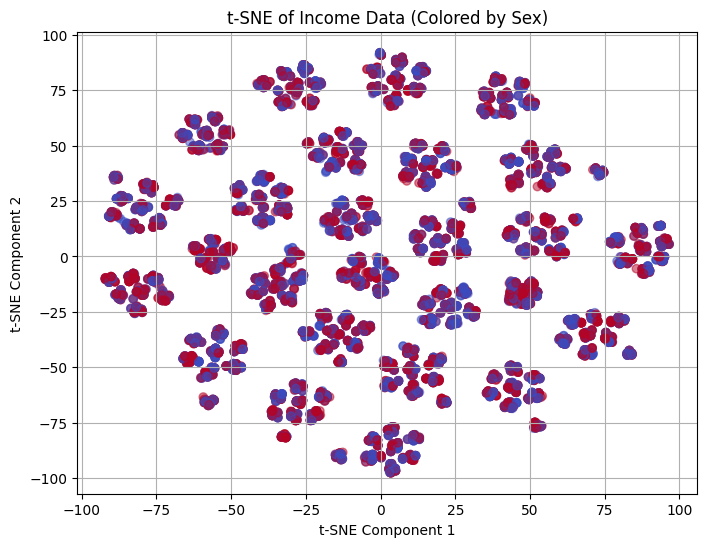

In [42]:
perplexity_values = [5, 10, 25, 40, 50]
def perplexity_values_testing():
    for perplexity in perplexity_values:
        tsne = TSNE(learning_rate="auto", init="random", perplexity=perplexity)
        X_tsne = tsne.fit_transform(X_scaled)

        plt.figure(figsize=(8, 6))
        plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=(y == 'Man'), cmap='coolwarm', alpha=0.5)
        plt.xlabel("t-SNE Component 1")
        plt.ylabel("t-SNE Component 2")
        plt.title("t-SNE of Income Data (Colored by Sex)")
        plt.grid(True)
        plt.show()

perplexity_values_testing()

# Section 2

Down below we perform the some of the tasks from the exercies, while predicting different things compared to the code above. 

In [ ]:
try:
    from rich import load_ipython_extension
    %load_ext rich
except ImportError:
    try:
        from rich import pretty
        pretty.install()
    except ImportError:
        pass

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pingouin as pg
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture as GMM
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, StratifiedKFold
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.inspection import permutation_importance
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

Using the cleaned dataset created in assignment 1

In [ ]:
data = pd.read_csv("../data/manipulated_data.csv")
data

sex    age income_bracket  year  total_sum_sek_millions  \
0         Man  16-19            TOT  2018                   547.9   
1         Man  16-19              0  2018                     0.0   
2         Man  16-19           1-19  2018                   137.9   
3         Man  16-19          20-39  2018                   106.1   
4         Man  16-19          40-59  2018                    77.2   
...       ...    ...            ...   ...                     ...   
409255  Woman  65-69          80-99  2012                     0.9   
409256  Woman  70-75            TOT  2012                     2.4   
409257  Woman  70-75              0  2012                     0.0   
409258  Woman  70-75           1-19  2012                     0.1   
409259  Woman  70-75          80-99  2012                     0.6   

        number_of_persons region_name       level_of_education  
0                   38091   Stockholm  primary/lower secondary  
1                   13357   Stockholm  primary/lower secondary  
2                   17417   Stockholm  primary/lower secondary  
3                    3763   Stockholm  primary/lower secondary  
4                    1574   Stockholm  primary/lower secondary  
...                   ...         ...                      ...  
409255                 10  Norrbotten                  unknown  
409256                 36  Norrbotten                  unknown  
409257                 11  Norrbotten                  unknown  
409258                  6  Norrbotten                  unknown  
409259                  6  Norrbotten                  unknown  

[409260 rows x 8 columns]

Checking data types

In [ ]:
data.dtypes


sex                        object
age                        object
income_bracket             object
year                        int64
total_sum_sek_millions    float64
number_of_persons           int64
region_name                object
level_of_education         object
dtype: object

To set data types correctly for each column the function and type map from assignment 1 is used.

In [ ]:
def convert_types(type_map, df):
    for item in type_map.items():
        if item[1] == "int64":
            df[item[0]] = pd.to_numeric(df[item[0]], errors="coerce").astype("Int64")
        elif item[1] == "float64":
            df[item[0]] = pd.to_numeric(df[item[0]], errors="coerce").astype("float64")
        elif item[1] == "string":
            df[item[0]] = df[item[0]].astype("string")

In [ ]:
type_map_data = {
    "region_name": "string",
    "level_of_education": "string",
    "sex": "string",
    "age": "string",
    "income_bracket": "string",
    "year": "int64",
    "total_sum_sek_millions": "float64",
    "number_of_persons": "int64",
}

convert_types(type_map_data, data)
data.dtypes


sex                       string[python]
age                       string[python]
income_bracket            string[python]
year                               Int64
total_sum_sek_millions           float64
number_of_persons                  Int64
region_name               string[python]
level_of_education        string[python]
dtype: object

I will try to classify which age the test instances has based on their features.

In [ ]:
data["age"].unique().tolist()

['16-19', '20-29', '30-39', '40-49', '50-59', '60-64', '65-69', '70-75']

Number of instances for each age bin

In [ ]:
data["age"].value_counts()


age
30-39    58938
40-49    57395
20-29    57333
50-59    55641
60-64    53044
65-69    52566
70-75    50595
16-19    23748
Name: count, dtype: Int64

Removing the TOT rows from income bracket beacause I believe it will not help the model and it doesn't make sense to keep it for this task.

In [ ]:
data = data[data["income_bracket"] != "TOT"]

data

sex    age income_bracket  year  total_sum_sek_millions  \
1         Man  16-19              0  2018                     0.0   
2         Man  16-19           1-19  2018                   137.9   
3         Man  16-19          20-39  2018                   106.1   
4         Man  16-19          40-59  2018                    77.2   
5         Man  16-19          60-79  2018                    50.9   
...       ...    ...            ...   ...                     ...   
409254  Woman  65-69           1-19  2012                     0.0   
409255  Woman  65-69          80-99  2012                     0.9   
409257  Woman  70-75              0  2012                     0.0   
409258  Woman  70-75           1-19  2012                     0.1   
409259  Woman  70-75          80-99  2012                     0.6   

        number_of_persons region_name       level_of_education  
1                   13357   Stockholm  primary/lower secondary  
2                   17417   Stockholm  primary/lower secondary  
3                    3763   Stockholm  primary/lower secondary  
4                    1574   Stockholm  primary/lower secondary  
5                     745   Stockholm  primary/lower secondary  
...                   ...         ...                      ...  
409254                  4  Norrbotten                  unknown  
409255                 10  Norrbotten                  unknown  
409257                 11  Norrbotten                  unknown  
409258                  6  Norrbotten                  unknown  
409259                  6  Norrbotten                  unknown  

[389844 rows x 8 columns]

Age map for hopefully boosting performance a bit.

In [ ]:
age_map = {"16-19": 0, "20-29": 1, "30-39": 2, "40-49": 3, "50-59": 4, "60-64": 5, "65-69": 6, "70-75": 7}

In [ ]:
data = data.copy()
data["age"] = data["age"].map(age_map).astype("int64")

data["age"].unique().tolist()

[0, 1, 2, 3, 4, 5, 6, 7]

In [ ]:
labels = data[["age"]]
labels

age
1         0
2         0
3         0
4         0
5         0
...     ...
409254    6
409255    6
409257    7
409258    7
409259    7

[389844 rows x 1 columns]

I will use all features in the first experiment.

In [ ]:
features = data.drop(columns="age")
features

sex income_bracket  year  total_sum_sek_millions  number_of_persons  \
1         Man              0  2018                     0.0              13357   
2         Man           1-19  2018                   137.9              17417   
3         Man          20-39  2018                   106.1               3763   
4         Man          40-59  2018                    77.2               1574   
5         Man          60-79  2018                    50.9                745   
...       ...            ...   ...                     ...                ...   
409254  Woman           1-19  2012                     0.0                  4   
409255  Woman          80-99  2012                     0.9                 10   
409257  Woman              0  2012                     0.0                 11   
409258  Woman           1-19  2012                     0.1                  6   
409259  Woman          80-99  2012                     0.6                  6   

       region_name       level_of_education  
1        Stockholm  primary/lower secondary  
2        Stockholm  primary/lower secondary  
3        Stockholm  primary/lower secondary  
4        Stockholm  primary/lower secondary  
5        Stockholm  primary/lower secondary  
...            ...                      ...  
409254  Norrbotten                  unknown  
409255  Norrbotten                  unknown  
409257  Norrbotten                  unknown  
409258  Norrbotten                  unknown  
409259  Norrbotten                  unknown  

[389844 rows x 7 columns]

Below I group the dataset by `level_of_education`, summing `total_sum_sek_millions` and `number_of_persons` for each education level.
Then plots each education level as a point, with `number_of_persons` on the x-axis and `total_sum_sek_millions` on the y-axis. Each point is colored by education level.
And fits a linear regression model to predict total income (`total_sum_sek_millions`) from population size (`number_of_persons`), using the aggregated data.
I include the regression line in the scatterplot.

This is done to visualize and model the relationship between population size and total income for each education level, showing both the data points and the overall trend.

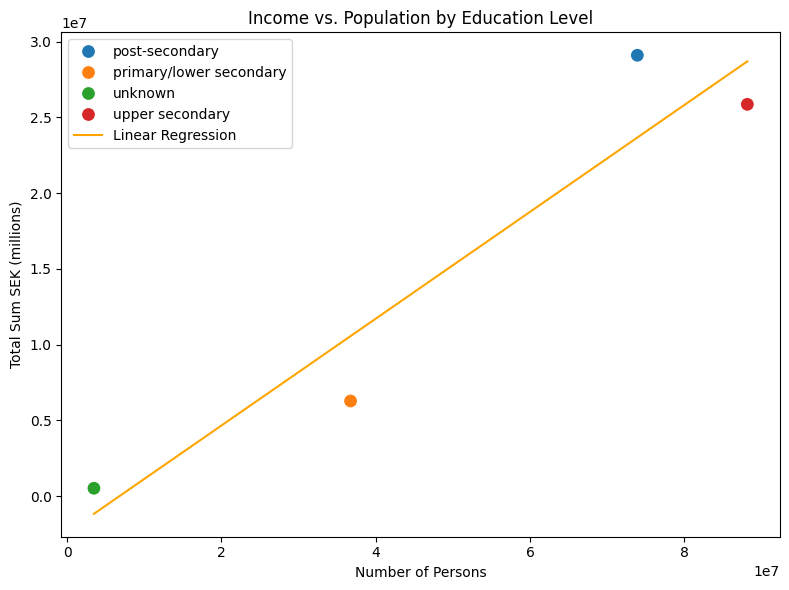

In [ ]:
edu_group = (
    data.groupby("level_of_education").agg({"total_sum_sek_millions": "sum", "number_of_persons": "sum"}).reset_index()
)

plt.figure(figsize=(8, 6))
sns.scatterplot(
    x="number_of_persons",
    y="total_sum_sek_millions",
    data=edu_group,
    hue="level_of_education",
    palette="tab10",
    s=100,
)

X = edu_group[["number_of_persons"]]
y = edu_group["total_sum_sek_millions"]
model = LinearRegression()
model.fit(X, y)
xfit = np.linspace(X.min(), X.max(), 100)
xfit_df = pd.DataFrame(xfit, columns=["number_of_persons"])
yfit = model.predict(xfit_df)
plt.plot(xfit, yfit, color="orange", label="Linear Regression")

plt.xlabel("Number of Persons")
plt.ylabel("Total Sum SEK (millions)")
plt.title("Income vs. Population by Education Level")
plt.legend()
plt.tight_layout()
plt.show()

This code groups the data by region and education, calculates average income per person, clusters the groups into 4 clusters using k-means, and visualizes the clusters on a log-log scatterplot. This helps to identify patterns or groupings among regions based on income and population, with additional context from education levels.

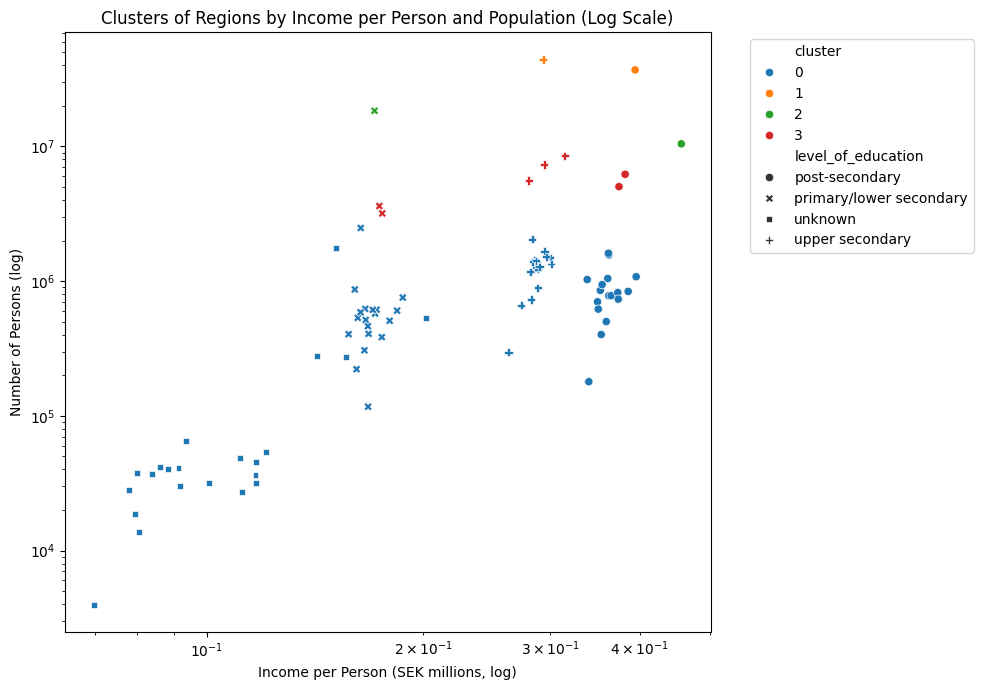

In [ ]:
agg = (
    data.groupby(["region_name", "level_of_education"])
    .agg({"total_sum_sek_millions": "sum", "number_of_persons": "sum"})
    .reset_index()
)

agg["income_per_person"] = agg["total_sum_sek_millions"] / agg["number_of_persons"]

X_agg = agg[["income_per_person", "number_of_persons"]].fillna(0)

kmeans = KMeans(n_clusters=4, random_state=42)
agg["cluster"] = kmeans.fit_predict(X_agg)

plt.figure(figsize=(10, 7))
sns.scatterplot(
    x="income_per_person", y="number_of_persons", hue="cluster", style="level_of_education", data=agg, palette="tab10"
)
plt.xscale("log")
plt.yscale("log")
plt.title("Clusters of Regions by Income per Person and Population (Log Scale)")
plt.xlabel("Income per Person (SEK millions, log)")
plt.ylabel("Number of Persons (log)")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

Using GMM instead the clusters are similar but not exactly the same.

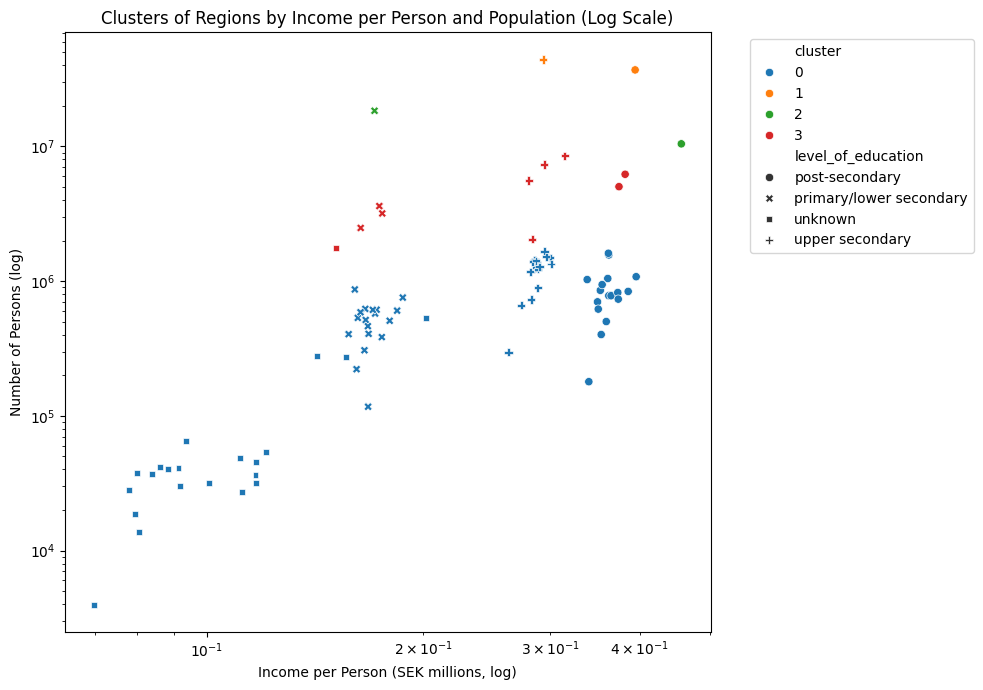

In [ ]:
gmm = GMM(n_components=4, random_state=42)
agg["cluster"] = gmm.fit_predict(X_agg)

plt.figure(figsize=(10, 7))
sns.scatterplot(
    x="income_per_person", y="number_of_persons", hue="cluster", style="level_of_education", data=agg, palette="tab10"
)
plt.xscale("log")
plt.yscale("log")
plt.title("Clusters of Regions by Income per Person and Population (Log Scale)")
plt.xlabel("Income per Person (SEK millions, log)")
plt.ylabel("Number of Persons (log)")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

Here I create my test and train splits and show how they look. Using stratify to preserve balanced buckets.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, train_size=0.7, random_state=42, stratify=labels, shuffle=True)

X_train

sex income_bracket  year  total_sum_sek_millions  number_of_persons  \
113665    Man        220-239  2020                    17.3                 75   
346363    Man        400-499  2013                   124.8                285   
261373    Man          1000+  2015                     9.1                  7   
38648   Woman        140-159  2011                    60.9                407   
262689    Man        120-139  2015                    13.5                103   
...       ...            ...   ...                     ...                ...   
114658    Man        320-339  2020                    56.1                170   
65106     Man        180-199  2023                     2.9                 15   
355475    Man        120-139  2022                    19.6                149   
348529  Woman        500-599  2013                    33.0                 61   
63539   Woman          1000+  2023                     6.6                  5   

         region_name       level_of_education  
113665       Uppsala           post-secondary  
346363       Dalarna  primary/lower secondary  
261373      Värmland  primary/lower secondary  
38648       Blekinge          upper secondary  
262689        Örebro  primary/lower secondary  
...              ...                      ...  
114658  Södermanland          upper secondary  
65106        Gotland           post-secondary  
355475       Uppsala          upper secondary  
348529     Gävleborg           post-secondary  
63539         Kalmar          upper secondary  

[272890 rows x 7 columns]

In [ ]:
y_train

age
113665    6
346363    5
261373    6
38648     6
262689    6
...     ...
114658    6
65106     6
355475    2
348529    6
63539     2

[272890 rows x 1 columns]

HistGradientBoostingClassifier can handle catagorical features if added as seperate list of columns name so thats what is done here.

In [ ]:
cat_features = features.drop(columns=["year", "total_sum_sek_millions", "number_of_persons"]).columns.to_list()

cat_features

['sex', 'income_bracket', 'region_name', 'level_of_education']

Fit HistGradientBoostingClassifier with the standard settings for hyperparameters with the only addition of using class_weight="balanced" to balance out that number of instances in classes differ.

In [ ]:
hgb_clf = HistGradientBoostingClassifier(
    loss="log_loss",
    learning_rate=0.1,
    max_iter=100,
    categorical_features=cat_features,
    l2_regularization=0,
    validation_fraction=0.1,
    n_iter_no_change=10,
    verbose=1,
    random_state=42,
    class_weight="balanced",
).fit(X=X_train, y=y_train.squeeze())

Binning 0.014 GB of training data: 0.050 s
Binning 0.002 GB of validation data: 

/home/joel/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.002 s
Fitting gradient boosted rounds:
Fit 800 trees in 6.999 s, (24800 total leaves)
Time spent computing histograms: 1.967s
Time spent finding best splits:  0.328s
Time spent applying splits:      1.330s
Time spent predicting:           0.308s


Make predictions on the test set with the classifier.

In [ ]:
y_pred_bad = hgb_clf.predict(X=X_test)

Print the classification report for the comparison of true labels and predicted labels.

As seen below this seems to be a though task for the classifier. Only the age of 16-19 was predicted fairly accurate. This is probably because most of the other age buckets doesn't tend to be that different from each other.

In [ ]:
print(classification_report(y_test, y_pred_bad))

              precision    recall  f1-score   support

           0       0.48      0.95      0.64      6468
           1       0.52      0.50      0.51     16461
           2       0.46      0.29      0.36     16942
           3       0.36      0.24      0.29     16479
           4       0.43      0.32      0.37     15953
           5       0.42      0.52      0.47     15176
           6       0.36      0.47      0.41     15033
           7       0.47      0.53      0.50     14442

    accuracy                           0.44    116954
   macro avg       0.44      0.48      0.44    116954
weighted avg       0.43      0.44      0.42    116954



Print overall accuracy to highlight it.

In [ ]:
hgb_clf.score(X=X_test, y=y_test)

0.43583802178634334

Create a confusion matrix that show True/False positives and negatives.

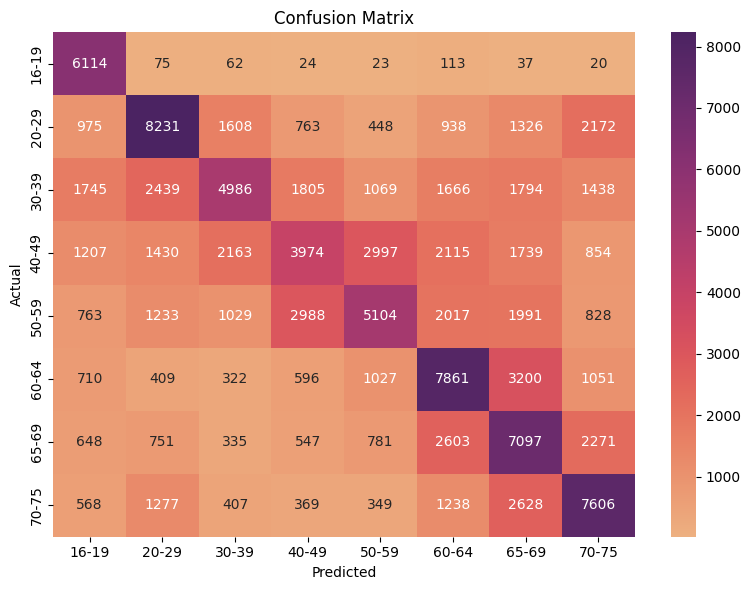

In [ ]:
cm = confusion_matrix(y_true=y_test, y_pred=y_pred_bad)

labels_names = ["16-19", "20-29", "30-39", "40-49", "50-59", "60-64", "65-69", "70-75"]

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="flare", xticklabels=labels_names, yticklabels=labels_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

Do a ten-fold cross validation to see if the accuracy is about the same.

StratifiedKFold is used to preserve the balance of age buckets. 

In [ ]:
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(hgb_clf, features, labels.squeeze(), cv=cv, verbose=1)
scores.mean()

Binning 0.018 GB of training data: 0.052 s
Binning 0.002 GB of validation data: 0.005 s
Fitting gradient boosted rounds:
Fit 800 trees in 10.936 s, (24800 total leaves)
Time spent computing histograms: 3.192s
Time spent finding best splits:  0.449s
Time spent applying splits:      2.226s
Time spent predicting:           0.520s
Binning 0.018 GB of training data: 0.049 s
Binning 0.002 GB of validation data: 0.004 s
Fitting gradient boosted rounds:
Fit 800 trees in 12.300 s, (24800 total leaves)
Time spent computing histograms: 3.585s
Time spent finding best splits:  0.488s
Time spent applying splits:      2.445s
Time spent predicting:           0.576s
Binning 0.018 GB of training data: 0.045 s
Binning 0.002 GB of validation data: 0.003 s
Fitting gradient boosted rounds:
Fit 800 trees in 12.897 s, (24800 total leaves)
Time spent computing histograms: 3.942s
Time spent finding best splits:  0.559s
Time spent applying splits:      2.550s
Time spent predicting:           0.572s
Binning 0.018

0.438134243095124

Hyperparameter Tuning to hopefully boost performance.

In [ ]:
learning_rate = [0.01, 0.05, 0.1, 0.2]
max_iter = [100, 300, 500, 1000]
max_leaf_nodes = [10, 20, 31, 50, 100] # default = 31
max_depth = [3, 5, 8, None]
min_samples_leaf = [1, 5, 10, 20, 50]
l2_regularization = [0, 1e-3, 1e-2, 1e-1, 1]
max_features = [0.3, 0.5, 0.7, 1.0]

In [ ]:
param_grid = [
    {
        "learning_rate": learning_rate,
        "max_iter": max_iter,
        "max_leaf_nodes": max_leaf_nodes,
        "max_depth": max_depth,
        "min_samples_leaf": min_samples_leaf,
        "l2_regularization": l2_regularization,
        "max_features": max_features,
    }
]

StratifiedKFold is used to preserve the balance of age buckets and RadomizedSearch was used instead of gridsearch to speed up the process. Scoring is f1_macro to try to get as good accuracy on each class as possible. 

In [ ]:
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
hgb_clf = RandomizedSearchCV(
    HistGradientBoostingClassifier(verbose=1, categorical_features=cat_features, class_weight="balanced"),
    param_grid,
    random_state=42,
    verbose=1,
    cv=cv,
    scoring="f1_weighted",
    n_jobs=-1,
)
search = hgb_clf.fit(features, labels.squeeze())
search.best_params_

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Binning 0.018 GB of training data: Binning 0.018 GB of training data: Binning 0.018 GB of training data: Binning 0.018 GB of training data: Binning 0.018 GB of training data: 0.466 s
Binning 0.002 GB of validation data: Binning 0.018 GB of training data: 0.224 s
Binning 0.002 GB of validation data: 0.044 s
Fitting gradient boosted rounds:
0.019 s
Fitting gradient boosted rounds:
0.242 s
Binning 0.002 GB of validation data: 0.021 s
Fitting gradient boosted rounds:
0.295 s
Binning 0.002 GB of validation data: 0.057 s
0.254 s
Fitting gradient boosted rounds:
Binning 0.002 GB of validation data: 0.021 sBinning 0.018 GB of training data: 
Fitting gradient boosted rounds:
0.417 s
Binning 0.002 GB of validation data: 0.025 s
Fitting gradient boosted rounds:
Binning 0.018 GB of training data: 0.245 s
Binning 0.002 GB of validation data: 0.022 s
Fitting gradient boosted rounds:
0.227 s
Binning 0.002 GB of validation data: 0.020 s
Fi


{
    'min_samples_leaf': 1,
    'max_leaf_nodes': 100,
    'max_iter': 1000,
    'max_features': 0.5,
    'max_depth': None,
    'learning_rate': 0.05,
    'l2_regularization': 0.01
}

Shows the best model configurations found.

In [ ]:
search.best_estimator_

HistGradientBoostingClassifier(categorical_features=['sex', 'income_bracket',
                                                     'region_name',
                                                     'level_of_education'],
                               class_weight='balanced', l2_regularization=0.01,
                               learning_rate=0.05, max_features=0.5,
                               max_iter=1000, max_leaf_nodes=100,
                               min_samples_leaf=1, verbose=1)

Fit a new model with the best configurations.

In [ ]:
hgb_clf = search.best_estimator_
hgb_clf.fit(X_train, y_train.squeeze())
y_pred_better = hgb_clf.predict(X_test)

Binning 0.014 GB of training data: 0.032 s
Binning 0.002 GB of validation data: 0.002 s
Fitting gradient boosted rounds:
Fit 8000 trees in 134.700 s, (800000 total leaves)
Time spent computing histograms: 32.155s
Time spent finding best splits:  25.310s
Time spent applying splits:      25.670s
Time spent predicting:           3.959s


New report with slightly better results but nothing to significant.

In [ ]:
print(classification_report(y_pred_better, y_test))

              precision    recall  f1-score   support

           0       0.86      0.72      0.79      7749
           1       0.60      0.58      0.59     17043
           2       0.43      0.50      0.46     14635
           3       0.33      0.40      0.36     13465
           4       0.41      0.47      0.44     14165
           5       0.59      0.51      0.55     17482
           6       0.49      0.44      0.46     16974
           7       0.60      0.56      0.58     15441

    accuracy                           0.51    116954
   macro avg       0.54      0.52      0.53    116954
weighted avg       0.53      0.51      0.52    116954



In [ ]:
hgb_clf.score(X=X_test, y=y_test)

0.5117653094378987

In [ ]:
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(hgb_clf, features, labels.squeeze(), cv=cv, verbose=1)
scores.mean()

Binning 0.018 GB of training data: 0.053 s
Binning 0.002 GB of validation data: 0.004 s
Fitting gradient boosted rounds:
Fit 8000 trees in 152.444 s, (800000 total leaves)
Time spent computing histograms: 38.206s
Time spent finding best splits:  25.691s
Time spent applying splits:      28.743s
Time spent predicting:           4.971s
Binning 0.018 GB of training data: 0.044 s
Binning 0.002 GB of validation data: 0.003 s
Fitting gradient boosted rounds:
Fit 8000 trees in 161.565 s, (800000 total leaves)
Time spent computing histograms: 40.552s
Time spent finding best splits:  27.620s
Time spent applying splits:      30.417s
Time spent predicting:           5.139s
Binning 0.018 GB of training data: 0.044 s
Binning 0.002 GB of validation data: 0.003 s
Fitting gradient boosted rounds:
Fit 8000 trees in 135.446 s, (800000 total leaves)
Time spent computing histograms: 33.859s
Time spent finding best splits:  22.614s
Time spent applying splits:      25.627s
Time spent predicting:           4.

0.520816036549862

A new confusion matrix to show the results from the best estimator.

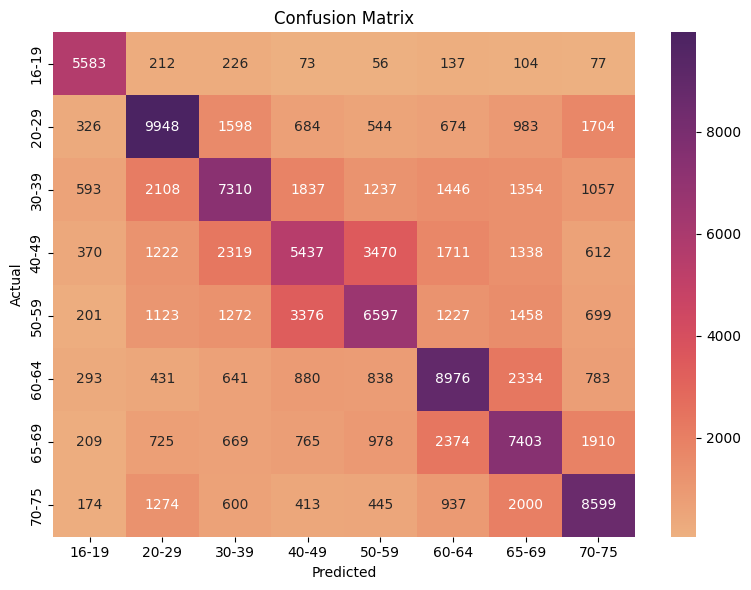

In [ ]:
cm = confusion_matrix(y_true=y_test, y_pred=y_pred_better)

labels_names = ["16-19", "20-29", "30-39", "40-49", "50-59", "60-64", "65-69", "70-75"]

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="flare", xticklabels=labels_names, yticklabels=labels_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

Made some feature importance searching, all features seem to be useful for the model.

In [ ]:
pi = permutation_importance(model, X_test, y_test, n_repeats=30, random_state=42)
pi["importances_mean"]


array([0.097098  , 0.25144644, 0.08515741, 0.21500647, 0.29579293,
       0.23299673, 0.2350873 ])

This is just for a cleaner visualization.

In [ ]:
pd.DataFrame([features.columns, pi["importances_mean"]]).T.set_index(0)

1
0                               
sex                     0.097098
income_bracket          0.251446
year                    0.085157
total_sum_sek_millions  0.215006
number_of_persons       0.295793
region_name             0.232997
level_of_education      0.235087

A test was performed on the five most important features using the parameters from the tuning.

In [ ]:
X_train_most = X_train.drop(columns=["sex", "year"])
X_test_most = X_test.drop(columns=["sex", "year"])

I slice the cat features array to use it in the model without the sex column

In [ ]:
cat_features[1:]

['income_bracket', 'region_name', 'level_of_education']

In [ ]:
hgb_clf = HistGradientBoostingClassifier(
    min_samples_leaf=1,
    max_leaf_nodes=100,
    max_iter=1000,
    max_features=0.5,
    max_depth=None,
    learning_rate=0.05,
    l2_regularization=0.01,
    verbose=1,
    class_weight="balanced",
    categorical_features=cat_features[1:],
)

Accuracy was decreased to even worse than the initial model.

In [ ]:
hgb_clf.fit(X_train_most, y_train.squeeze())
hgb_clf.score(X=X_test_most, y=y_test)

Binning 0.010 GB of training data: 0.031 s
Binning 0.001 GB of validation data: 0.002 s
Fitting gradient boosted rounds:
Fit 3944 trees in 51.160 s, (394400 total leaves)
Time spent computing histograms: 11.185s
Time spent finding best splits:  9.350s
Time spent applying splits:      10.221s
Time spent predicting:           1.827s


0.3994818475639995

A test was performed on the two least important features using the parameters from the tuning.

In [ ]:
X_train_least = X_train.drop(columns=["income_bracket", "total_sum_sek_millions", "number_of_persons", "region_name", "level_of_education"])
X_test_least = X_test.drop(
    columns=["income_bracket", "total_sum_sek_millions", "number_of_persons", "region_name", "level_of_education"]
)

Here sex is the only categorical feature I have in the data so I will give it as argument to the categorical_features parameter.

In [ ]:
hgb_clf = HistGradientBoostingClassifier(
    min_samples_leaf=1,
    max_leaf_nodes=100,
    max_iter=1000,
    max_features=0.5,
    max_depth=None,
    learning_rate=0.05,
    l2_regularization=0.01,
    verbose=1,
    class_weight="balanced",
    categorical_features=["sex"]
)

As expected the model got even worse than just guessing on the same class all the time.

In [ ]:
hgb_clf.fit(X_train_least, y_train.squeeze())
hgb_clf.score(X=X_test_least, y=y_test)

Binning 0.004 GB of training data: 0.019 s
Binning 0.000 GB of validation data: 0.001 s
Fitting gradient boosted rounds:
Fit 160 trees in 0.994 s, (1363 total leaves)
Time spent computing histograms: 0.199s
Time spent finding best splits:  0.032s
Time spent applying splits:      0.175s
Time spent predicting:           0.047s


0.10889751526241086

Which class is of a majority? I will predict only the majority class and see which accuracy I can achieve. Probably to many classes for this to be useful but will do it anyway.

In [ ]:
y_train.value_counts()


age
2      39532
3      38452
1      38408
4      37224
5      35410
6      35075
7      33698
0      15091
Name: count, dtype: int64

Class 2 is of majority but the classes are almost balanced and only class 0 is much smaller than the other ones. Therefore, only predicting class two will yield approximately 1/8 accuracy.

In [ ]:
y_majority = [2] * len(y_test)
accuracy_score(y_true=y_test, y_pred=y_majority)

0.14486037245412725

Checking for a normal distribution is useful, because it is often a requirement for using other metrics that the data is normally distributed.

In [ ]:
pg.normality(data)

/home/joel/.local/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 389844.
  res = hypotest_fun_out(*samples, **kwds)
/home/joel/.local/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 389844.
  res = hypotest_fun_out(*samples, **kwds)
/home/joel/.local/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 389844.
  res = hypotest_fun_out(*samples, **kwds)


W           pval  normal
age                     0.935780  2.566071e-126   False
year                    0.943760  1.941717e-122   False
total_sum_sek_millions  0.118112  1.793411e-215   False
number_of_persons       0.184068  1.753375e-212   False

A pairwise correlation analysis with all the columns of the dataframe is done here. Spearman correlation is used because the normality check indicated that the data wasn't normally distributed.

In [ ]:
pg.pairwise_corr(data, method="spearman")

X                       Y    method alternative  \
0                     age                    year  spearman   two-sided   
1                     age  total_sum_sek_millions  spearman   two-sided   
2                     age       number_of_persons  spearman   two-sided   
3                    year  total_sum_sek_millions  spearman   two-sided   
4                    year       number_of_persons  spearman   two-sided   
5  total_sum_sek_millions       number_of_persons  spearman   two-sided   

        n         r           CI95%          p-unc  power  
0  389844 -0.015166  [-0.02, -0.01]   2.801629e-21    1.0  
1  389844  0.042637    [0.04, 0.05]  2.793309e-156    1.0  
2  389844 -0.079050  [-0.08, -0.08]   0.000000e+00    1.0  
3  389844 -0.026152  [-0.03, -0.02]   5.922235e-60    1.0  
4  389844 -0.044662  [-0.05, -0.04]  2.712087e-171    1.0  
5  389844  0.793053    [0.79, 0.79]   0.000000e+00    1.0

**Make a new Pandas DataFrame with "classifier correctness" labels.** This DataFrame should have:

- One **column per classifier**, e.g. the "bad" classifier before hyperparameter tuning, the "better" classifier from after tuning, and the "majority" classifier.
- One **row per instance in your test set**.
- A value of **`True` or `False` in each cell**, depending on whether the classifier _(column)_ correctly classified the instance _(row)_ or not.

Your resulting DataFrame could look something like this:

|       | **better** | **bad**  | **majority** |
|-------|----------|----------|--------------|
| **0** | True     | False    | False        |
| **1** | True     | False    | False        |
| **2** | True     | True     | True         |
| ...   | ...      | ...      | ...          |

In [ ]:
y_majority_df = pd.DataFrame(
    y_majority,
    index=X_test.index,
    columns=["age"],
)
y_majority_df

age
180857    2
234529    2
16578     2
252931    2
293568    2
...     ...
234736    2
3371      2
407777    2
78508     2
221549    2

[116954 rows x 1 columns]

In [ ]:
y_pred_better_df = pd.DataFrame(
    y_pred_better,
    index=X_test.index,
    columns=["age"],
)
y_pred_better_df

age
180857    7
234529    6
16578     1
252931    4
293568    7
...     ...
234736    7
3371      0
407777    5
78508     3
221549    7

[116954 rows x 1 columns]

In [ ]:
y_pred_bad_df = pd.DataFrame(
    y_pred_bad,
    index=X_test.index,
    columns=["age"],
)
y_pred_bad_df

age
180857    7
234529    5
16578     1
252931    5
293568    7
...     ...
234736    7
3371      0
407777    6
78508     3
221549    6

[116954 rows x 1 columns]

In [ ]:
df_eval = pd.DataFrame(
    {
        "better": y_pred_better_df["age"] == y_test["age"],
        "bad": y_pred_bad_df["age"] == y_test["age"],
        "majority": y_majority_df["age"] == y_test["age"],
    }
)
df_eval

better    bad  majority
180857    True   True     False
234529    True  False     False
16578    False  False     False
252931    True  False     False
293568   False  False     False
...        ...    ...       ...
234736    True   True     False
3371      True   True     False
407777   False   True     False
78508     True   True     False
221549    True  False     False

[116954 rows x 3 columns]

**Is the "bad" model (no hyperparameter tuning) still significantly better than the "majority" class model?**

We answer this question by using **McNemar's test,** using a significance level of $0.05$.  This means that if McNemar's test gives us a $p$-value $< 0.05$, we accept that there is a significant difference between our two classifiers.

In [ ]:
observed, stats = pg.chi2_mcnemar(df_eval, "bad", "majority")
stats

chi2  dof  p-approx  p-exact
mcnemar  19985.863694    1       0.0      0.0

**Is the "better" model (from after tuning) significantly better than the "bad" model (from before tuning)?**  Same as above, just comparing different columns.

In [ ]:
observed, stats = pg.chi2_mcnemar(df_eval, "better", "bad")
stats

chi2  dof  p-approx  p-exact
mcnemar  2772.168794    1       0.0      0.0

**Perform a principal component analysis (PCA).** Two dimensions are a common choice to make them suitable for visualization and then results is plotted.


### The code below is doing following:
- **Selects numeric columns**: `"year"`, `"total_sum_sek_millions"`, and `"number_of_persons"` from your dataset.
- **Standardizes** these features (mean=0, std=1) using `StandardScaler`.
- **Performs PCA** (Principal Component Analysis) to reduce these 3 features to 2 principal components (`PC1`, `PC2`).
- **Creates a DataFrame** with the two principal components and the corresponding `"age"` class.
- **Plots** a scatterplot of the data in the new 2D PCA space, coloring each point by its age group.

**Plot**
- The plot shows how the data is distributed in the space of the two most important linear combinations of the numeric features.
- Each point represents an instance, colored by its age group.
- In the plot, the age groups appear highly mixed, indicating that `"year"`, `"total_sum_sek_millions"`, and `"number_of_persons"` do **not** provide strong separation between age classes after PCA.

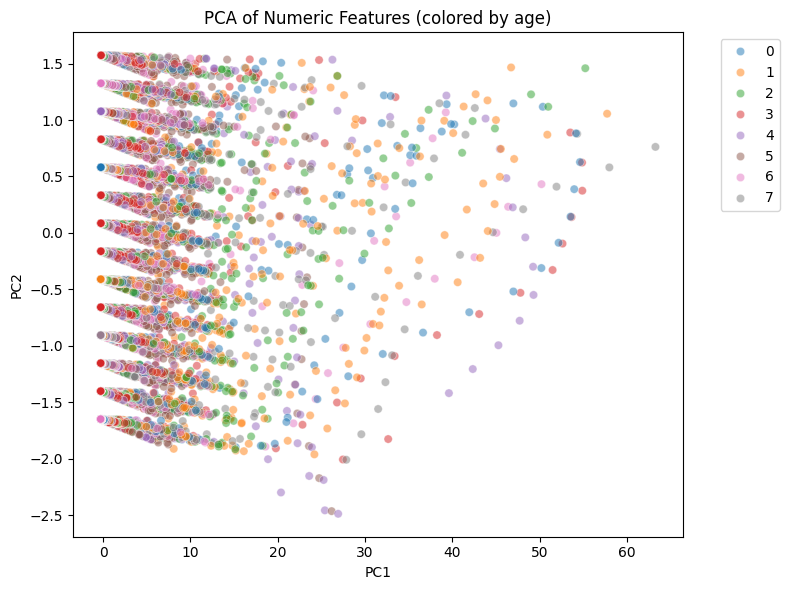

In [ ]:
numeric_cols = ["year", "total_sum_sek_millions", "number_of_persons"]
X_numeric = data[numeric_cols].dropna()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numeric)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
pca_df["age"] = data.loc[X_numeric.index, "age"].astype(str)

plt.figure(figsize=(8, 6))
sns.scatterplot(x="PC1", y="PC2", hue="age", data=pca_df, palette="tab10", alpha=0.5)
plt.title("PCA of Numeric Features (colored by age)")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

# Section 3

Down below we try to implement the same tasks as above, but predicting different things.

In [ ]:
try:
    from rich import load_ipython_extension
    %load_ext rich
except ImportError:
    try:
        from rich import pretty
        pretty.install()
    except ImportError:
        pass

The rich extension is already loaded. To reload it, use:
  %reload_ext rich


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pingouin as pg
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture as GMM
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, StratifiedKFold
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.inspection import permutation_importance
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

Using the cleaned dataset created in assignment 1

In [ ]:
data = pd.read_csv("../data/manipulated_data.csv")
data

sex    age income_bracket  year  total_sum_sek_millions  \
0         Man  16-19            TOT  2018                   547.9   
1         Man  16-19              0  2018                     0.0   
2         Man  16-19           1-19  2018                   137.9   
3         Man  16-19          20-39  2018                   106.1   
4         Man  16-19          40-59  2018                    77.2   
...       ...    ...            ...   ...                     ...   
409255  Woman  65-69          80-99  2012                     0.9   
409256  Woman  70-75            TOT  2012                     2.4   
409257  Woman  70-75              0  2012                     0.0   
409258  Woman  70-75           1-19  2012                     0.1   
409259  Woman  70-75          80-99  2012                     0.6   

        number_of_persons region_name       level_of_education  
0                   38091   Stockholm  primary/lower secondary  
1                   13357   Stockholm  primary/lower secondary  
2                   17417   Stockholm  primary/lower secondary  
3                    3763   Stockholm  primary/lower secondary  
4                    1574   Stockholm  primary/lower secondary  
...                   ...         ...                      ...  
409255                 10  Norrbotten                  unknown  
409256                 36  Norrbotten                  unknown  
409257                 11  Norrbotten                  unknown  
409258                  6  Norrbotten                  unknown  
409259                  6  Norrbotten                  unknown  

[409260 rows x 8 columns]

Checking data types

In [ ]:
data.dtypes


sex                        object
age                        object
income_bracket             object
year                        int64
total_sum_sek_millions    float64
number_of_persons           int64
region_name                object
level_of_education         object
dtype: object

To set data types correctly for each column the function and type map from assignment 1 is used.

In [ ]:
def convert_types(type_map, df):
    for item in type_map.items():
        if item[1] == "int64":
            df[item[0]] = pd.to_numeric(df[item[0]], errors="coerce").astype("Int64")
        elif item[1] == "float64":
            df[item[0]] = pd.to_numeric(df[item[0]], errors="coerce").astype("float64")
        elif item[1] == "string":
            df[item[0]] = df[item[0]].astype("string")

In [ ]:
type_map_data = {
    "region_name": "string",
    "level_of_education": "string",
    "sex": "string",
    "age": "string",
    "income_bracket": "string",
    "year": "int64",
    "total_sum_sek_millions": "float64",
    "number_of_persons": "int64",
}

convert_types(type_map_data, data)
data.dtypes


sex                       string[python]
age                       string[python]
income_bracket            string[python]
year                               Int64
total_sum_sek_millions           float64
number_of_persons                  Int64
region_name               string[python]
level_of_education        string[python]
dtype: object

We wanted to find out if there are any variables that correlate with each other. When we analyzed this (see below), we found no strong correlations. The only meaningful one is between the total sum and the number of persons, which makes sense, more money should generally mean more people that are working.

To do this, the categorical variables need to be converted into numeric values

In [ ]:
new_df = data.copy()

#converting categorical variables
new_df['sex'] = new_df['sex'].astype('category').cat.codes
new_df['age'] = new_df['age'].astype('category').cat.codes
new_df['income_bracket'] = new_df['income_bracket'].astype('category').cat.codes
new_df['region_name'] = new_df['region_name'].astype('category').cat.codes
new_df['level_of_education_num'] = new_df['level_of_education'].astype('category').cat.codes

#preform pairwise_corr 
corr_matrix = pg.pairwise_corr(new_df, method="pearson")

#sort the correlations to get the top 3 highest values (no self-correlation)
corr_values = corr_matrix[['X', 'Y', 'r']]

#sort by the correlation coefficient in descending order and get the top 3
top_3_corr = corr_values[corr_values['X'] != corr_values['Y']].sort_values(by='r', ascending=False).head(3)

print(top_3_corr)

                         X                       Y         r
22  total_sum_sek_millions       number_of_persons  0.916260
14          income_bracket  total_sum_sek_millions  0.109254
15          income_bracket       number_of_persons  0.105514


We tried to find a value that gives us better correlations. In the last assignment, we calculated average income. We reused that and ran it again, giving us a better correlation of 0.25 compared to the second best before, which was 0.1.

In [ ]:
new_df["avg_income"] = new_df["total_sum_sek_millions"] * 1_000_000 / new_df["number_of_persons"]

#preform pairwise_corr 
corr_matrix = pg.pairwise_corr(new_df, method="pearson")

#sort the correlations to get the top 3 highest values (no self-correlation)
corr_values = corr_matrix[['X', 'Y', 'r']]

#sort by the correlation coefficient in descending order and get the top 3
top_3_corr = corr_values[corr_values['X'] != corr_values['Y']].sort_values(by='r', ascending=False).head(3)

print(top_3_corr)

                         X                       Y         r
26  total_sum_sek_millions       number_of_persons  0.916260
20          income_bracket              avg_income  0.252788
16          income_bracket  total_sum_sek_millions  0.109254


We tried to run an SVC with a linear kernel, but it took a very long time and did not yield any good results. Instead, we tried with an RBF kernel and got some good results. We looked at only 2 years to keep the runtime reasonable.

In [ ]:
from sklearn.svm import SVC
new_df = new_df[new_df['year'] >= 2022]
X = new_df[["total_sum_sek_millions", "age", "sex", "avg_income"]] 
y = new_df["income_bracket"]

#Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(X_train)


#train SVM
model = SVC(C=1.0, gamma=0.0001, kernel="rbf")

#fit model
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy_score(y_pred, y_test)

0.9120255693168198

Finding out what was important for the classification.

In [ ]:
from sklearn.inspection import permutation_importance

pi = permutation_importance(model, X_test, y_test, n_repeats=3, random_state=0)
pi['importances_mean']


array([0.09260887, 0.        , 0.        , 0.85334931])

To make the results more readable, we print them with their name and value.

In [ ]:
used_features = ["total_sum_sek_millions", "age", "sex", "avg_income"]

# Skapa DataFrame med importances
importance_df = pd.DataFrame({
    "feature": used_features,
    "importance_mean": pi['importances_mean'],
    "importance_std": pi['importances_std']
})

# Sortera snyggt
importance_df = importance_df.sort_values(by="importance_mean", ascending=False)

# Visa
print(importance_df)

                  feature  importance_mean  importance_std
3              avg_income         0.853349        0.001813
0  total_sum_sek_millions         0.092609        0.000598
1                     age         0.000000        0.000000
2                     sex         0.000000        0.000000


We perform PCA in 3 dimensions on data from 2023 and onward.
We do this in an exploratory search.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

new_df = new_df.drop(columns=["level_of_education"])

#take only > 2023
X = new_df[new_df['year'] >= 2023]

#scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#preform pca
pca = PCA(n_components=3)
df_pca = pca.fit_transform(X_scaled)

df_pca = pd.DataFrame(df_pca, columns=["PC1", "PC2", "PC3"])


df_pca["region_name"] = new_df.loc[X.index, "region_name"].values
df_pca = df_pca.set_index("region_name")



We plot the results in 3D to see the results more clearly.
We see that a lot of the points are tightly clustered together, and some branch off in another direction.
Looking at this, it makes sense that the linear SVM had a hard time.

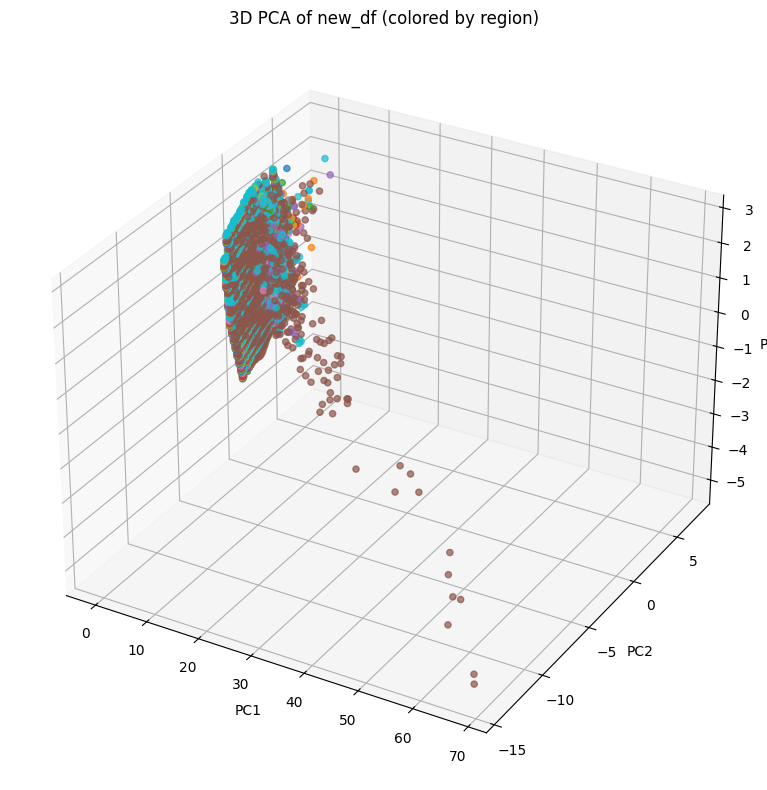

In [ ]:

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    df_pca["PC1"],
    df_pca["PC2"],
    df_pca["PC3"],
    c=df_pca.index.astype(int),
    cmap='tab10',
    alpha=0.7
)


ax.set_title("3D PCA of new_df (colored by region)")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")

plt.tight_layout()
plt.show()
